In [144]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB
print("Import successful!")

Import successful!


In [57]:
data = pd.read_csv(r"C:\Users\sharm\Desktop\Dataset\loan_approval_data.csv")
df = data.copy()
data.head(20)


,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
5,6.0,8265.0,4831.0,Salaried,53.0,Single,1.0,602.0,1.0,0.56,19522.0,2911.0,9798.0,36.0,Home,Semiurban,Graduate,Male,Unemployed,No
6,7.0,18850.0,2768.0,Salaried,58.0,Married,0.0,687.0,0.0,0.48,14635.0,8991.0,26143.0,24.0,Home,Rural,Graduate,Male,Private,No
7,8.0,6426.0,3186.0,Salaried,47.0,Married,2.0,636.0,4.0,NaN,671.0,11572.0,33747.0,84.0,Personal,Rural,Graduate,Female,NaN,No
8,9.0,16423.0,NaN,Salaried,54.0,Married,1.0,729.0,0.0,0.59,777.0,43066.0,34651.0,36.0,Home,Semiurban,Graduate,Male,Private,No
9,10.0,13363.0,2599.0,Contract,35.0,Single,3.0,726.0,1.0,NaN,3022.0,29693.0,22182.0,60.0,Personal,Rural,Graduate,Female,Government,Yes


In [58]:
data.shape

(1000, 20)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [60]:
data.isna().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

## Quality 
- every column got 50 values missing
- applicant id does not effect output
- 

# Handling Missing Values

In [61]:
# seperating values 

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include='number').columns


In [62]:
categorical_cols.size + numerical_cols.size

20

In [63]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

## Imputing using simple Imputer 

In [64]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy = 'mean')
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

In [65]:
cat_imp = SimpleImputer(strategy = 'most_frequent')
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        1000 non-null   float64
 1   Applicant_Income    1000 non-null   float64
 2   Coapplicant_Income  1000 non-null   float64
 3   Employment_Status   1000 non-null   object 
 4   Age                 1000 non-null   float64
 5   Marital_Status      1000 non-null   object 
 6   Dependents          1000 non-null   float64
 7   Credit_Score        1000 non-null   float64
 8   Existing_Loans      1000 non-null   float64
 9   DTI_Ratio           1000 non-null   float64
 10  Savings             1000 non-null   float64
 11  Collateral_Value    1000 non-null   float64
 12  Loan_Amount         1000 non-null   float64
 13  Loan_Term           1000 non-null   float64
 14  Loan_Purpose        1000 non-null   object 
 15  Property_Area       1000 non-null   object 
 16  Educati

# EDA

([<matplotlib.patches.Wedge at 0x20b310fe0d0>,
 [Text(-0.6521425375337495, 0.8858386482531919, 'No'),
  Text(0.6521428261765839, -0.8858384357581341, 'Yes')],
 [Text(-0.3557141113820451, 0.48318471722901374, '70.2%'),
  Text(0.3557142688235912, -0.4831846013226186, '29.8%')])

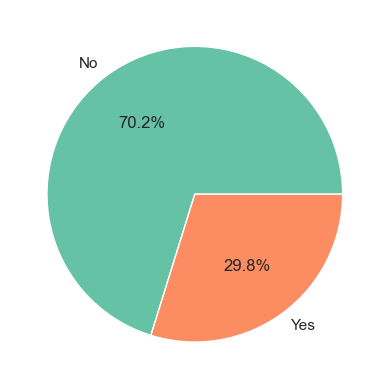

In [67]:
#how balanced out classes our
classes_counts = df["Loan_Approved"].value_counts()
plt.pie(classes_counts, labels=["No", "Yes"], autopct = "%1.1f%%")

[Text(0, 0, '621'), Text(0, 0, '379')]

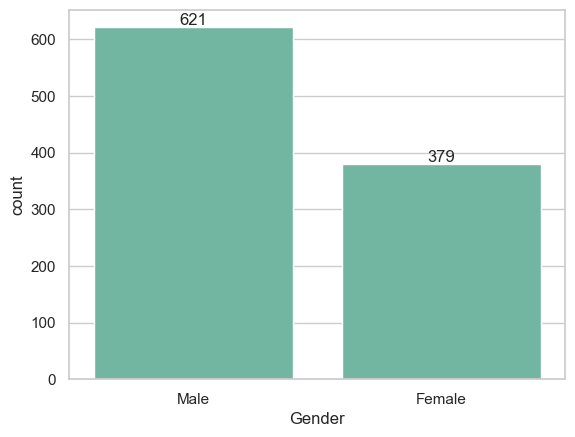

In [68]:
#analysing categories
gender_cnt = df["Gender"].value_counts()
ax = sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])


In [69]:
df[categorical_cols].columns

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

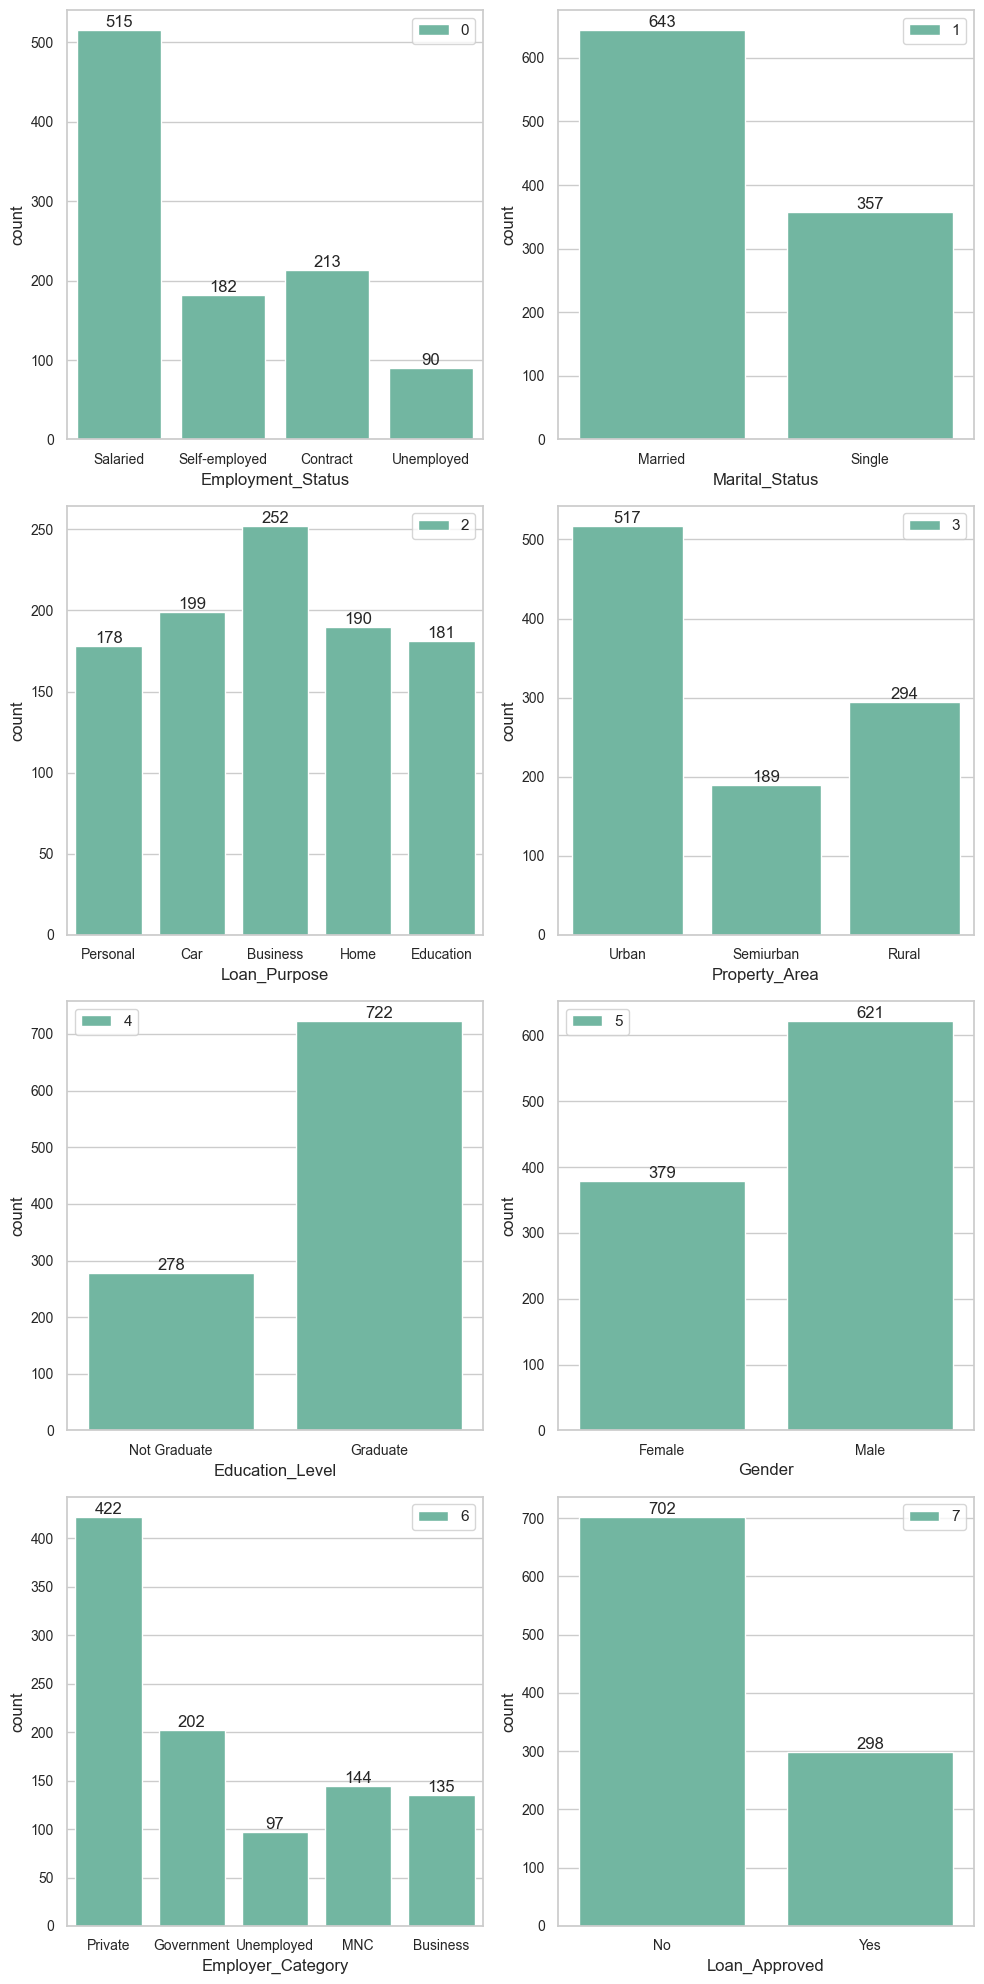

In [70]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

fig, ax = plt.subplots(4, 2, figsize=(10, 20))
ax = ax.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=ax[i],hue = i, palette = "Set2")

    ax[i].tick_params(axis='both', labelsize=10)
    ax[i].bar_label(ax[i].containers[0])
    ax[i].tick_params(axis='x')



plt.tight_layout()
plt.show()


<Axes: xlabel='Applicant_Income', ylabel='Count'>

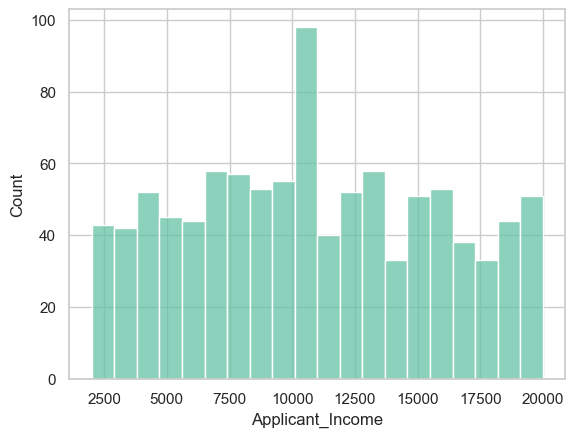

In [71]:
#analyze income using histogram 
sns.histplot(
    data = df,
    x = "Applicant_Income",
    bins = 20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

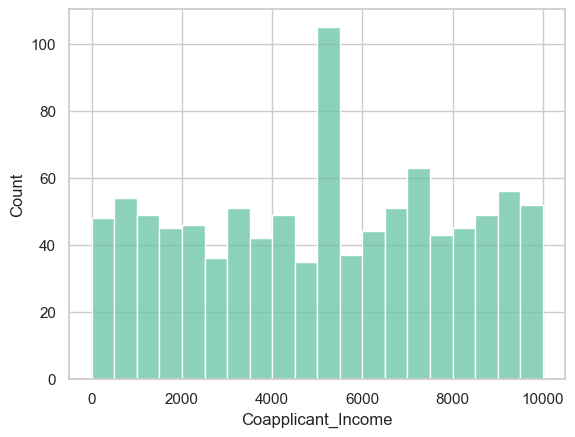

In [72]:
sns.histplot(
    data = df,
    x = "Coapplicant_Income",
    bins = 20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

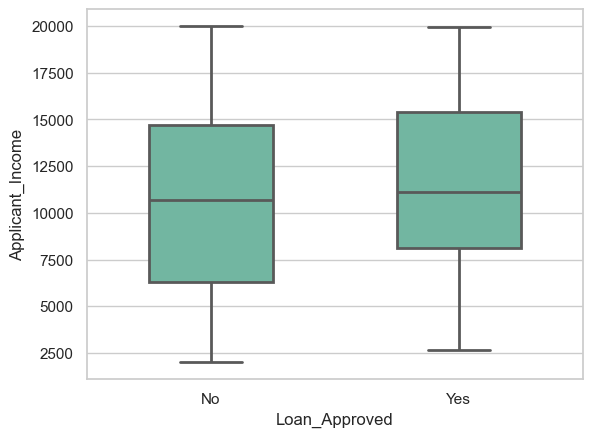

In [73]:
# outliers -  boxplots
sns.boxplot(
    data = df,
    x = "Loan_Approved",
    y = "Applicant_Income",
    width=0.5,
        linewidth=2,
        showfliers=False
)

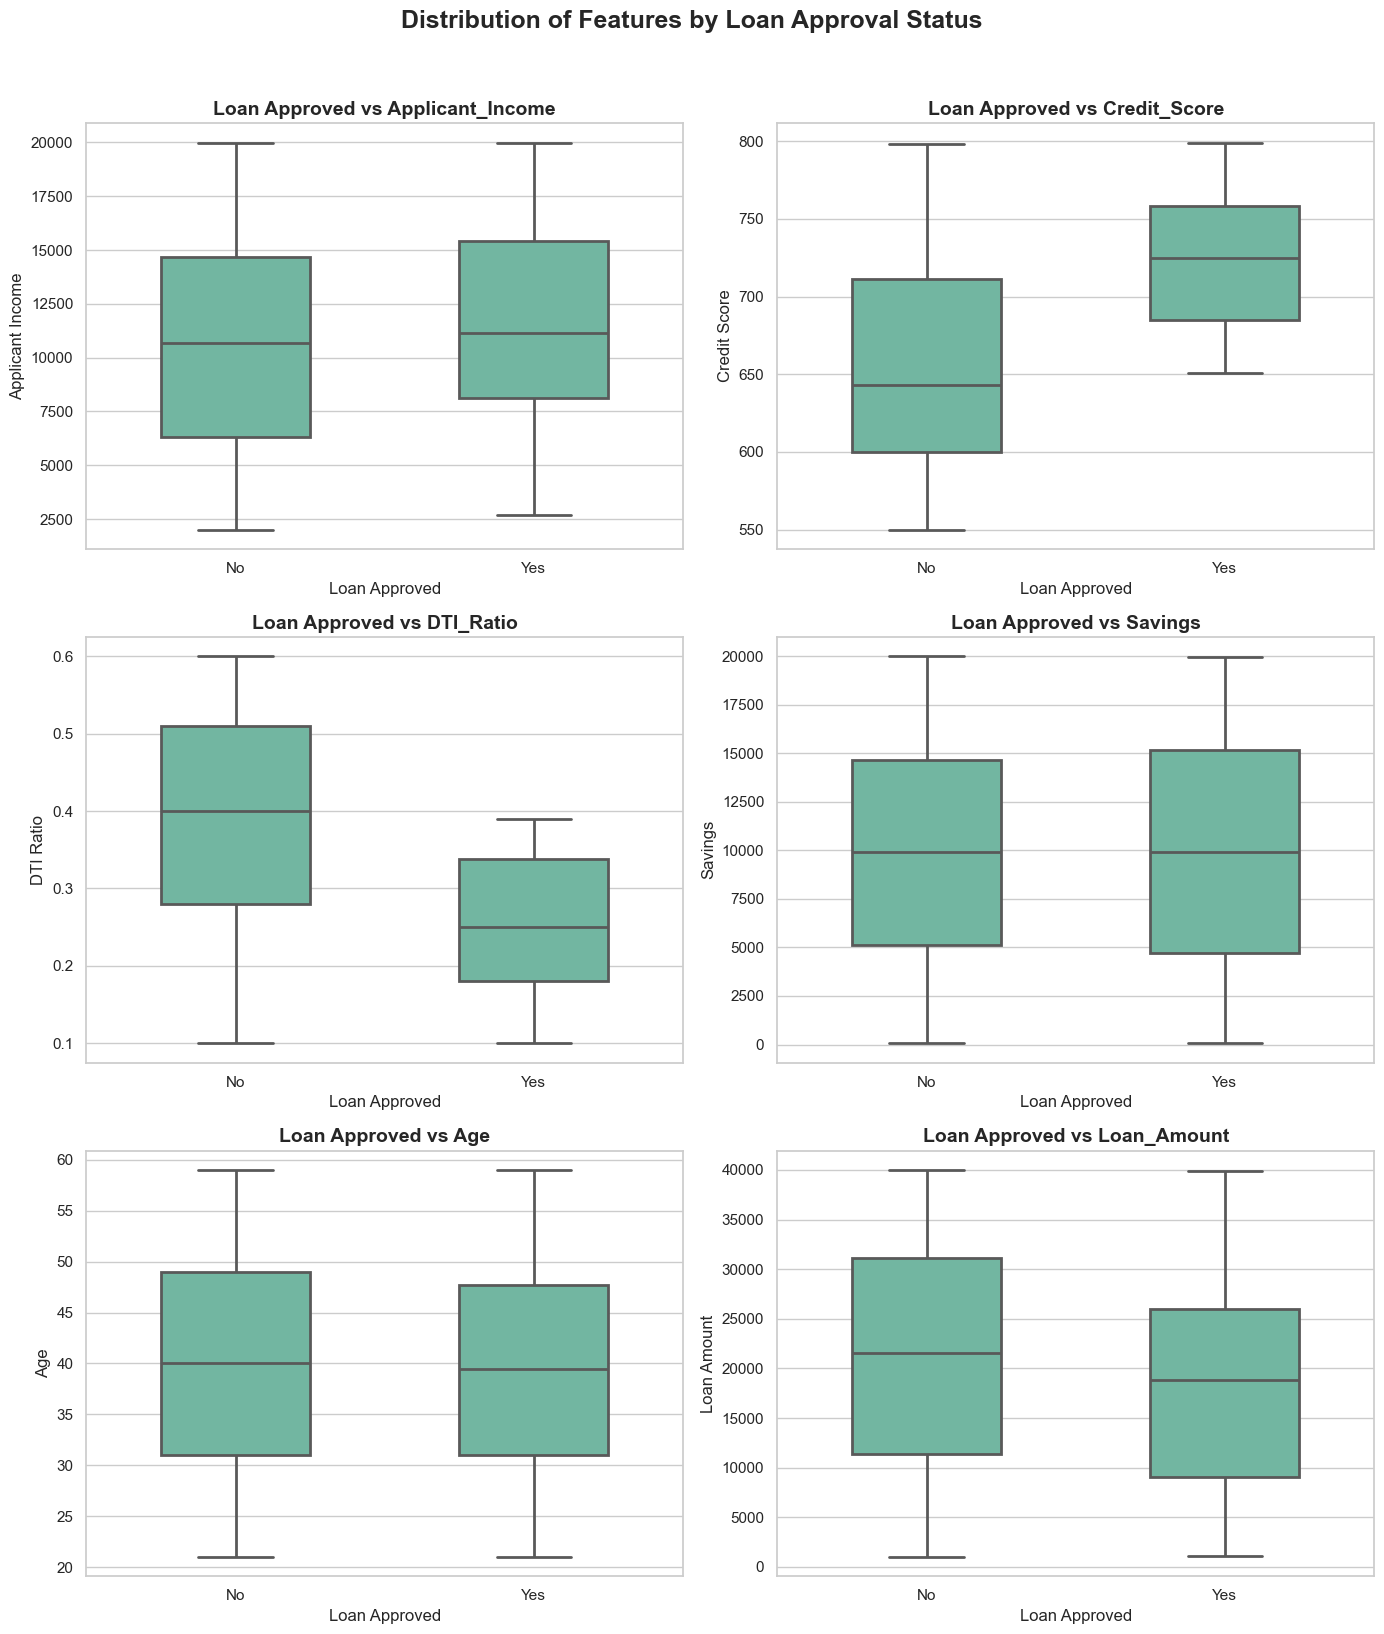

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Theme
sns.set_theme(style="whitegrid", palette="Set2")

fig, axes = plt.subplots(3, 2, figsize=(14, 16))
axes = axes.flatten()

features = [
    "Applicant_Income",
    "Credit_Score",
    "DTI_Ratio",
    "Savings",
    "Age",
    "Loan_Amount"
]

for i, feature in enumerate(features):
    sns.boxplot(
        ax=axes[i],
        data=df,
        x="Loan_Approved",
        y=feature,
        width=0.5,
        linewidth=2,
        showfliers=False
    )
    axes[i].set_title(f"Loan Approved vs {feature}", fontsize=14, fontweight="bold")
    axes[i].set_xlabel("Loan Approved", fontsize=12)
    axes[i].set_ylabel(feature.replace("_", " "), fontsize=12)
    axes[i].tick_params(axis="both", labelsize=11)

# Overall title
fig.suptitle("Distribution of Features by Loan Approval Status",
             fontsize=18, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()


<Axes: xlabel='Credit_Score', ylabel='Count'>

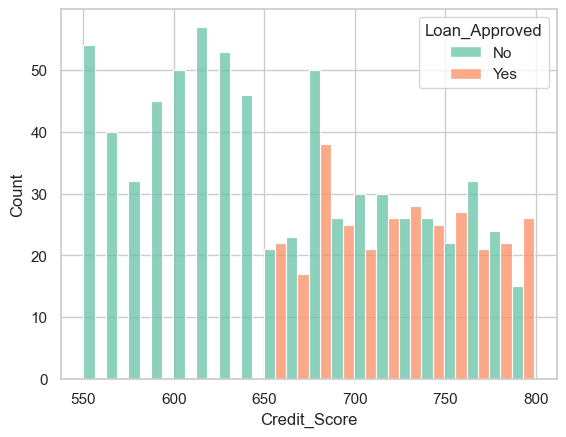

In [75]:
# Credit Score vs Loan Approved

sns.histplot(
    data = df,
    x = "Credit_Score",
    hue = "Loan_Approved",
    bins = 20,
    multiple = "dodge"
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

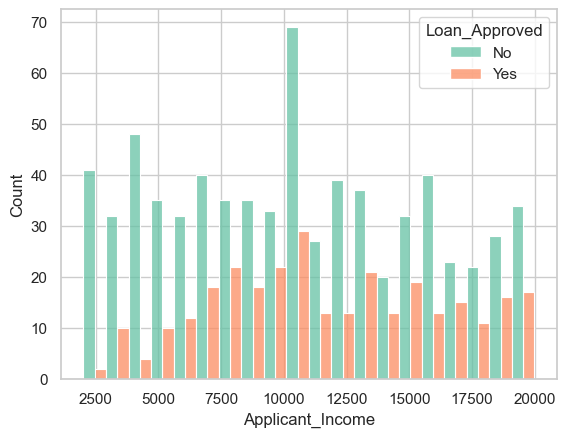

In [76]:
sns.histplot(
    data = df,
    x = "Applicant_Income",
    hue = "Loan_Approved",
    bins = 20,
    multiple = "dodge"
)

# Encoding

In [83]:
df.head()
df.columns
df.info()
df = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_ID                     1000 non-null   float64
 1   Applicant_Income                 1000 non-null   float64
 2   Coapplicant_Income               1000 non-null   float64
 3   Age                              1000 non-null   float64
 4   Dependents                       1000 non-null   float64
 5   Credit_Score                     1000 non-null   float64
 6   Existing_Loans                   1000 non-null   float64
 7   DTI_Ratio                        1000 non-null   float64
 8   Savings                          1000 non-null   float64
 9   Collateral_Value                 1000 non-null   float64
 10  Loan_Amount                      1000 non-null   float64
 11  Loan_Term                        1000 non-null   float64
 12  Education_Level      

In [84]:
# i lost my data in previous step so i had to do it all over again
# thats why theres so many functions in one cell


categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy="mean")
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

cat_imp = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])
cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index=df.index)

df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)



In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_ID                     1000 non-null   float64
 1   Applicant_Income                 1000 non-null   float64
 2   Coapplicant_Income               1000 non-null   float64
 3   Age                              1000 non-null   float64
 4   Dependents                       1000 non-null   float64
 5   Credit_Score                     1000 non-null   float64
 6   Existing_Loans                   1000 non-null   float64
 7   DTI_Ratio                        1000 non-null   float64
 8   Savings                          1000 non-null   float64
 9   Collateral_Value                 1000 non-null   float64
 10  Loan_Amount                      1000 non-null   float64
 11  Loan_Term                        1000 non-null   float64
 12  Education_Level      

In [89]:
numerical_cols = df.select_dtypes(include = 'number')
corr_matrix = numerical_cols.corr()
corr_matrix

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
Applicant_ID,1.000000,0.020970,0.041140,0.014579,0.012495,-0.028170,0.024995,0.000174,0.022692,0.031759,...,0.005426,-0.039878,0.019178,0.012969,-0.030187,0.036067,0.005906,-0.074056,0.022803,0.038417
Applicant_Income,0.020970,1.000000,0.007545,-0.023988,-0.026658,-0.009818,-0.010457,-0.009107,-0.028358,0.018789,...,0.032794,0.074209,-0.031234,0.004845,-0.036260,-0.020871,-0.025011,0.102589,-0.044639,-0.011995
Coapplicant_Income,0.041140,0.007545,1.000000,0.014306,-0.026733,0.058423,0.012418,0.058078,-0.015047,0.009457,...,0.028000,0.016022,0.059549,-0.010058,0.030045,-0.010148,-0.001146,0.037640,0.004312,-0.047929
Age,0.014579,-0.023988,0.014306,1.000000,-0.018767,-0.004212,0.023330,0.007903,-0.000986,0.037382,...,-0.006283,0.029865,0.037293,0.003100,-0.025661,0.048402,-0.066041,0.021232,-0.012960,0.072462
Dependents,0.012495,-0.026658,-0.026733,-0.018767,1.000000,-0.007687,-0.026338,0.011498,-0.004981,0.023004,...,-0.044642,0.027343,-0.005785,-0.032278,0.024082,0.013706,-0.009250,-0.018757,0.030197,-0.054147
Credit_Score,-0.028170,-0.009818,0.058423,-0.004212,-0.007687,1.000000,-0.007130,0.002338,-0.065353,0.007865,...,0.026013,-0.008658,0.015324,-0.006946,0.004445,-0.039739,-0.007076,0.066736,-0.000049,-0.046087
Existing_Loans,0.024995,-0.010457,0.012418,0.023330,-0.026338,-0.007130,1.000000,0.047008,0.034435,-0.049916,...,-0.010035,0.001777,0.023212,-0.053971,0.035629,-0.038762,-0.009642,0.030520,-0.019306,0.045391
DTI_Ratio,0.000174,-0.009107,0.058078,0.007903,0.011498,0.002338,0.047008,1.000000,0.004663,-0.009622,...,0.040432,-0.014125,-0.036648,0.044898,-0.006156,0.009624,-0.007214,0.002090,-0.003506,0.026018
Savings,0.022692,-0.028358,-0.015047,-0.000986,-0.004981,-0.065353,0.034435,0.004663,1.000000,0.015481,...,0.032558,-0.012217,-0.028948,0.005438,0.016833,-0.006667,-0.011683,0.004381,-0.030208,0.027178
Collateral_Value,0.031759,0.018789,0.009457,0.037382,0.023004,0.007865,-0.049916,-0.009622,0.015481,1.000000,...,0.040406,-0.050975,-0.007120,0.020061,0.007975,0.000897,0.035760,-0.013464,-0.014480,-0.009655


In [90]:
numerical_cols.corr()["Loan_Approved"].sort_values(ascending = False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Applicant_ID                      -0.011167
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed    

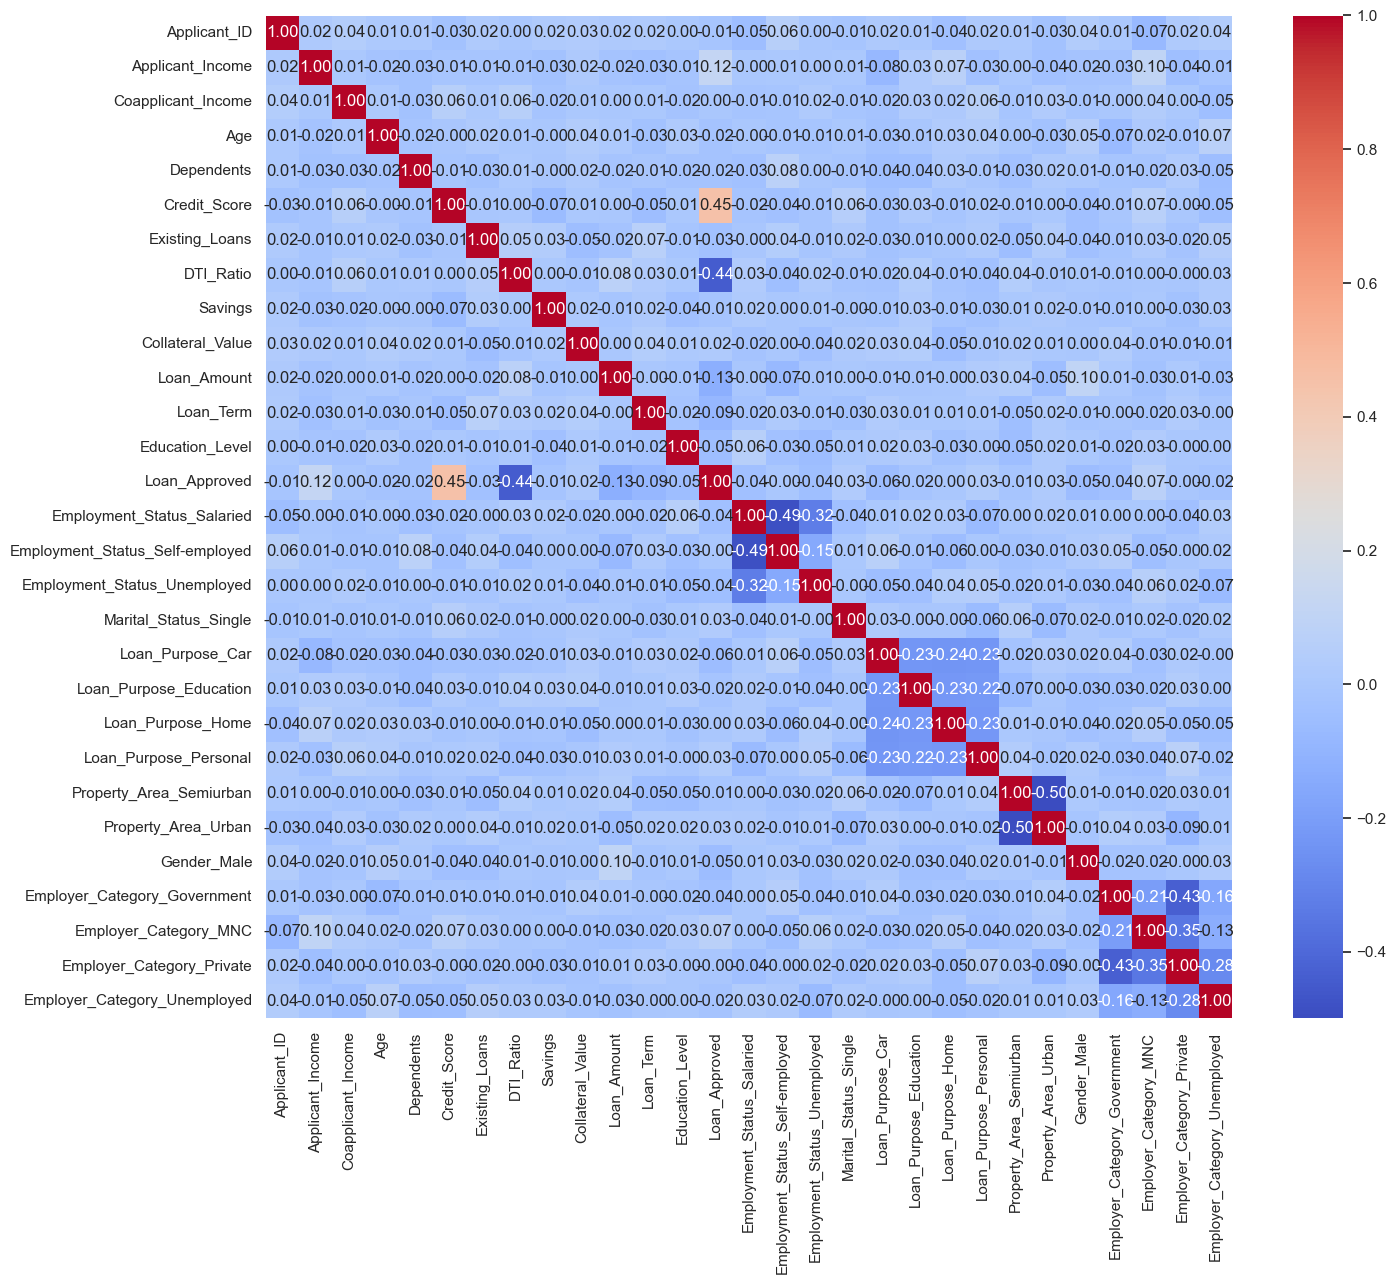

In [102]:
plt.figure(figsize=(15, 13))
sns.heatmap(
    corr_matrix,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm"
)
plt.tight_layout()

# Train-Test-Split + Feature Scaling


In [106]:
X = df.drop("Loan_Approved", axis = 1)
y = df["Loan_Approved"]

In [107]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Loan_Approved, dtype: int64

In [148]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)


In [149]:
#standardizing

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
X_train_scaled

array([[-1.66336551, -1.01234556,  1.02716377, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [ 0.1281584 , -1.23639141, -1.59187898, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [ 0.69464817, -0.01158625,  1.33606578, ..., -0.41388776,
         1.16316   , -0.30723158],
       ...,
       [ 1.27884075, -0.22727759,  0.35008962, ..., -0.41388776,
         1.16316   , -0.30723158],
       [ 0.00501768,  1.12970221, -0.46470044, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [-1.40490455, -1.75526629,  0.01434173, ...,  2.416114  ,
        -0.85972695, -0.30723158]], shape=(800, 28))

# Train and Evaludate Models 

In [151]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [152]:
y_pred = lr.predict(X_test_scaled)

In [153]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1 Score  :", f1)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy  : 0.87
Precision : 0.7868852459016393
Recall    : 0.7868852459016393
F1 Score  : 0.7868852459016393

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       139
           1       0.79      0.79      0.79        61

    accuracy                           0.87       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.87      0.87      0.87       200

Confusion Matrix:
 [[126  13]
 [ 13  48]]


In [154]:
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

In [155]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1 Score  :", f1)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy  : 0.755
Precision : 0.6428571428571429
Recall    : 0.4426229508196721
F1 Score  : 0.5242718446601942

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.84       139
           1       0.64      0.44      0.52        61

    accuracy                           0.76       200
   macro avg       0.71      0.67      0.68       200
weighted avg       0.74      0.76      0.74       200

Confusion Matrix:
 [[124  15]
 [ 34  27]]


In [156]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

In [157]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1 Score  :", f1)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy  : 0.865
Precision : 0.8035714285714286
Recall    : 0.7377049180327869
F1 Score  : 0.7692307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       139
           1       0.80      0.74      0.77        61

    accuracy                           0.86       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.86      0.86      0.86       200

Confusion Matrix:
 [[128  11]
 [ 16  45]]


# Best model on the basis of precision -> Naive Bayes 

## Feature engineering